Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")
# Increase default plot size
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully.")

Libraries loaded successfully.


Load Data

In [6]:
# Load the dataset
df = pd.read_csv('indiancrop_dataset.csv')

# Display first 5 rows
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2200, 9)


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,Rice


Data Cleaning

In [7]:
print("--- Cleaning Report ---")

# 1. Check for Missing Values
missing = df.isnull().sum().sum()
print(f"Missing Values: {missing}")

# 2. Check for Duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
else:
    print("No duplicates found.")

# 3. Sanity Checks (Physical constraints)
# pH must be between 0 and 14
# Humidity must be between 0 and 100
invalid_ph = df[(df['ph'] < 0) | (df['ph'] > 14)]
invalid_humidity = df[(df['HUMIDITY'] < 0) | (df['HUMIDITY'] > 100)]

if len(invalid_ph) > 0:
    print(f"⚠️ Found {len(invalid_ph)} rows with invalid pH. Dropping them.")
    df = df.drop(invalid_ph.index)

if len(invalid_humidity) > 0:
    print(f"⚠️ Found {len(invalid_humidity)} rows with invalid Humidity. Dropping them.")
    df = df.drop(invalid_humidity.index)

print(f"Final Dataset Shape: {df.shape}")

--- Cleaning Report ---
Missing Values: 0
No duplicates found.
Final Dataset Shape: (2200, 9)


Target Balance (The "Crop" Count)

C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_43524\2537842381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CROP', data=df, palette='viridis')


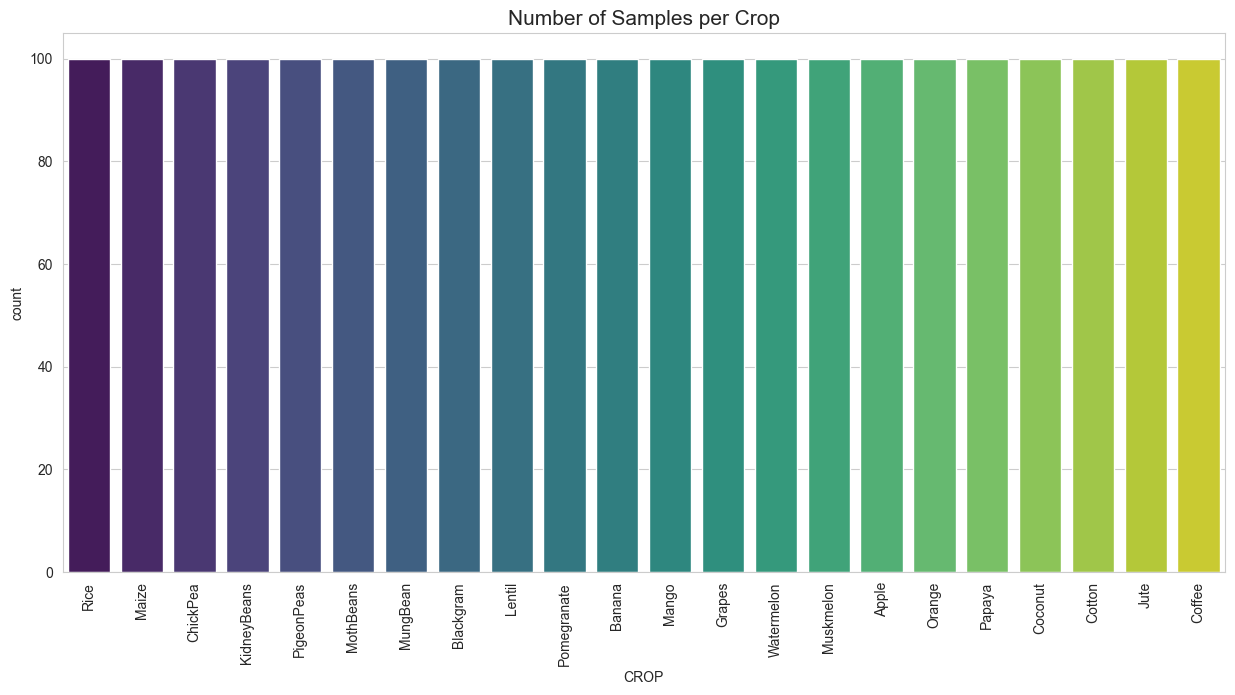

In [8]:
plt.figure(figsize=(15, 7))
sns.countplot(x='CROP', data=df, palette='viridis')
plt.title('Number of Samples per Crop', fontsize=15)
plt.xticks(rotation=90) # Rotate labels to make them readable
plt.show()

Correlation Heatmap

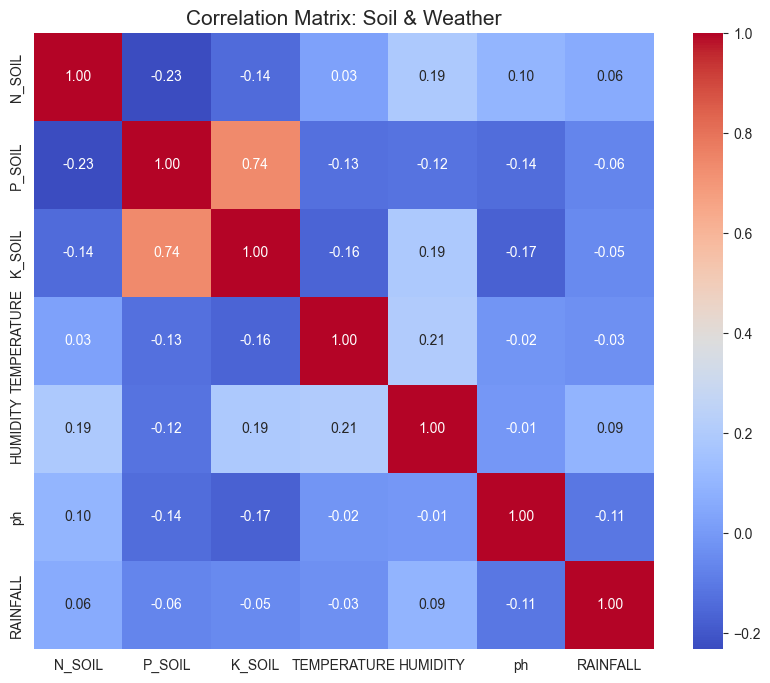

In [9]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Soil & Weather', fontsize=15)
plt.show()

Crop vs. Climate (Scatter Plot)

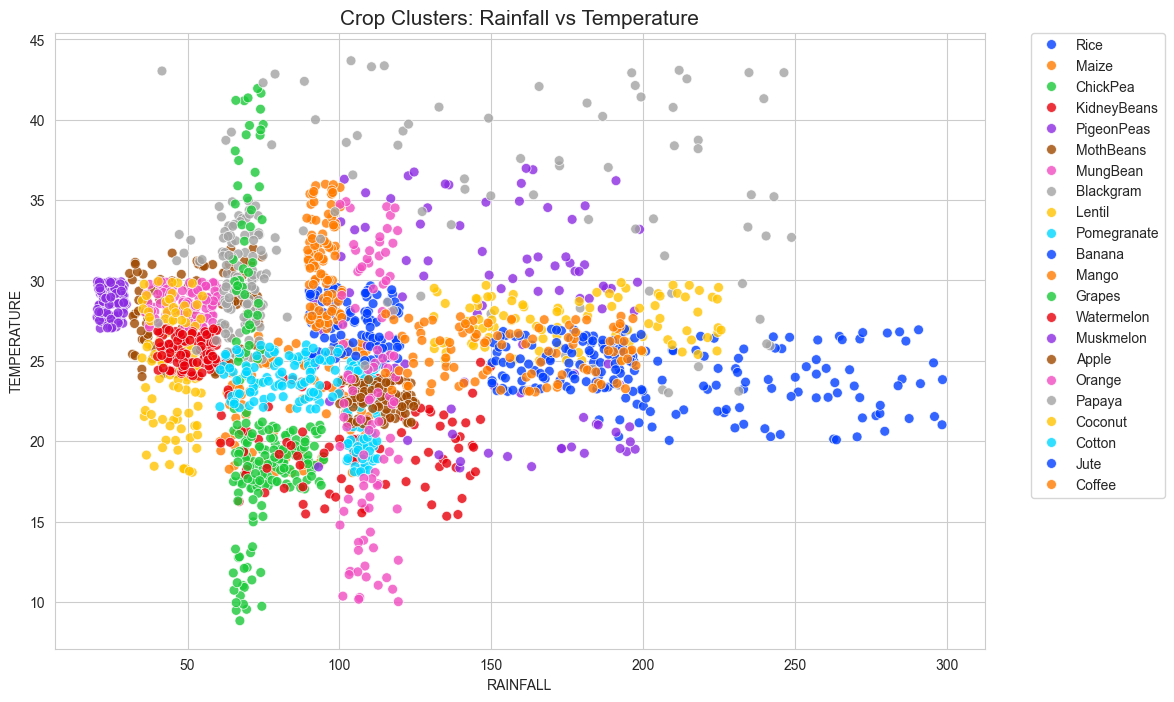

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='RAINFALL', 
    y='TEMPERATURE', 
    hue='CROP', 
    data=df, 
    palette='bright',
    s=50, 
    alpha=0.8
)
plt.title('Crop Clusters: Rainfall vs Temperature', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Nutrient Requirements (Box Plots)

C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_43524\2205281834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CROP', y='N_SOIL', data=df, ax=axes[0], palette='Reds')
C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_43524\2205281834.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CROP', y='P_SOIL', data=df, ax=axes[1], palette='Greens')
C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_43524\2205281834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CROP', y='K_SOIL', data=df, ax=axes[2], palette='Blues')


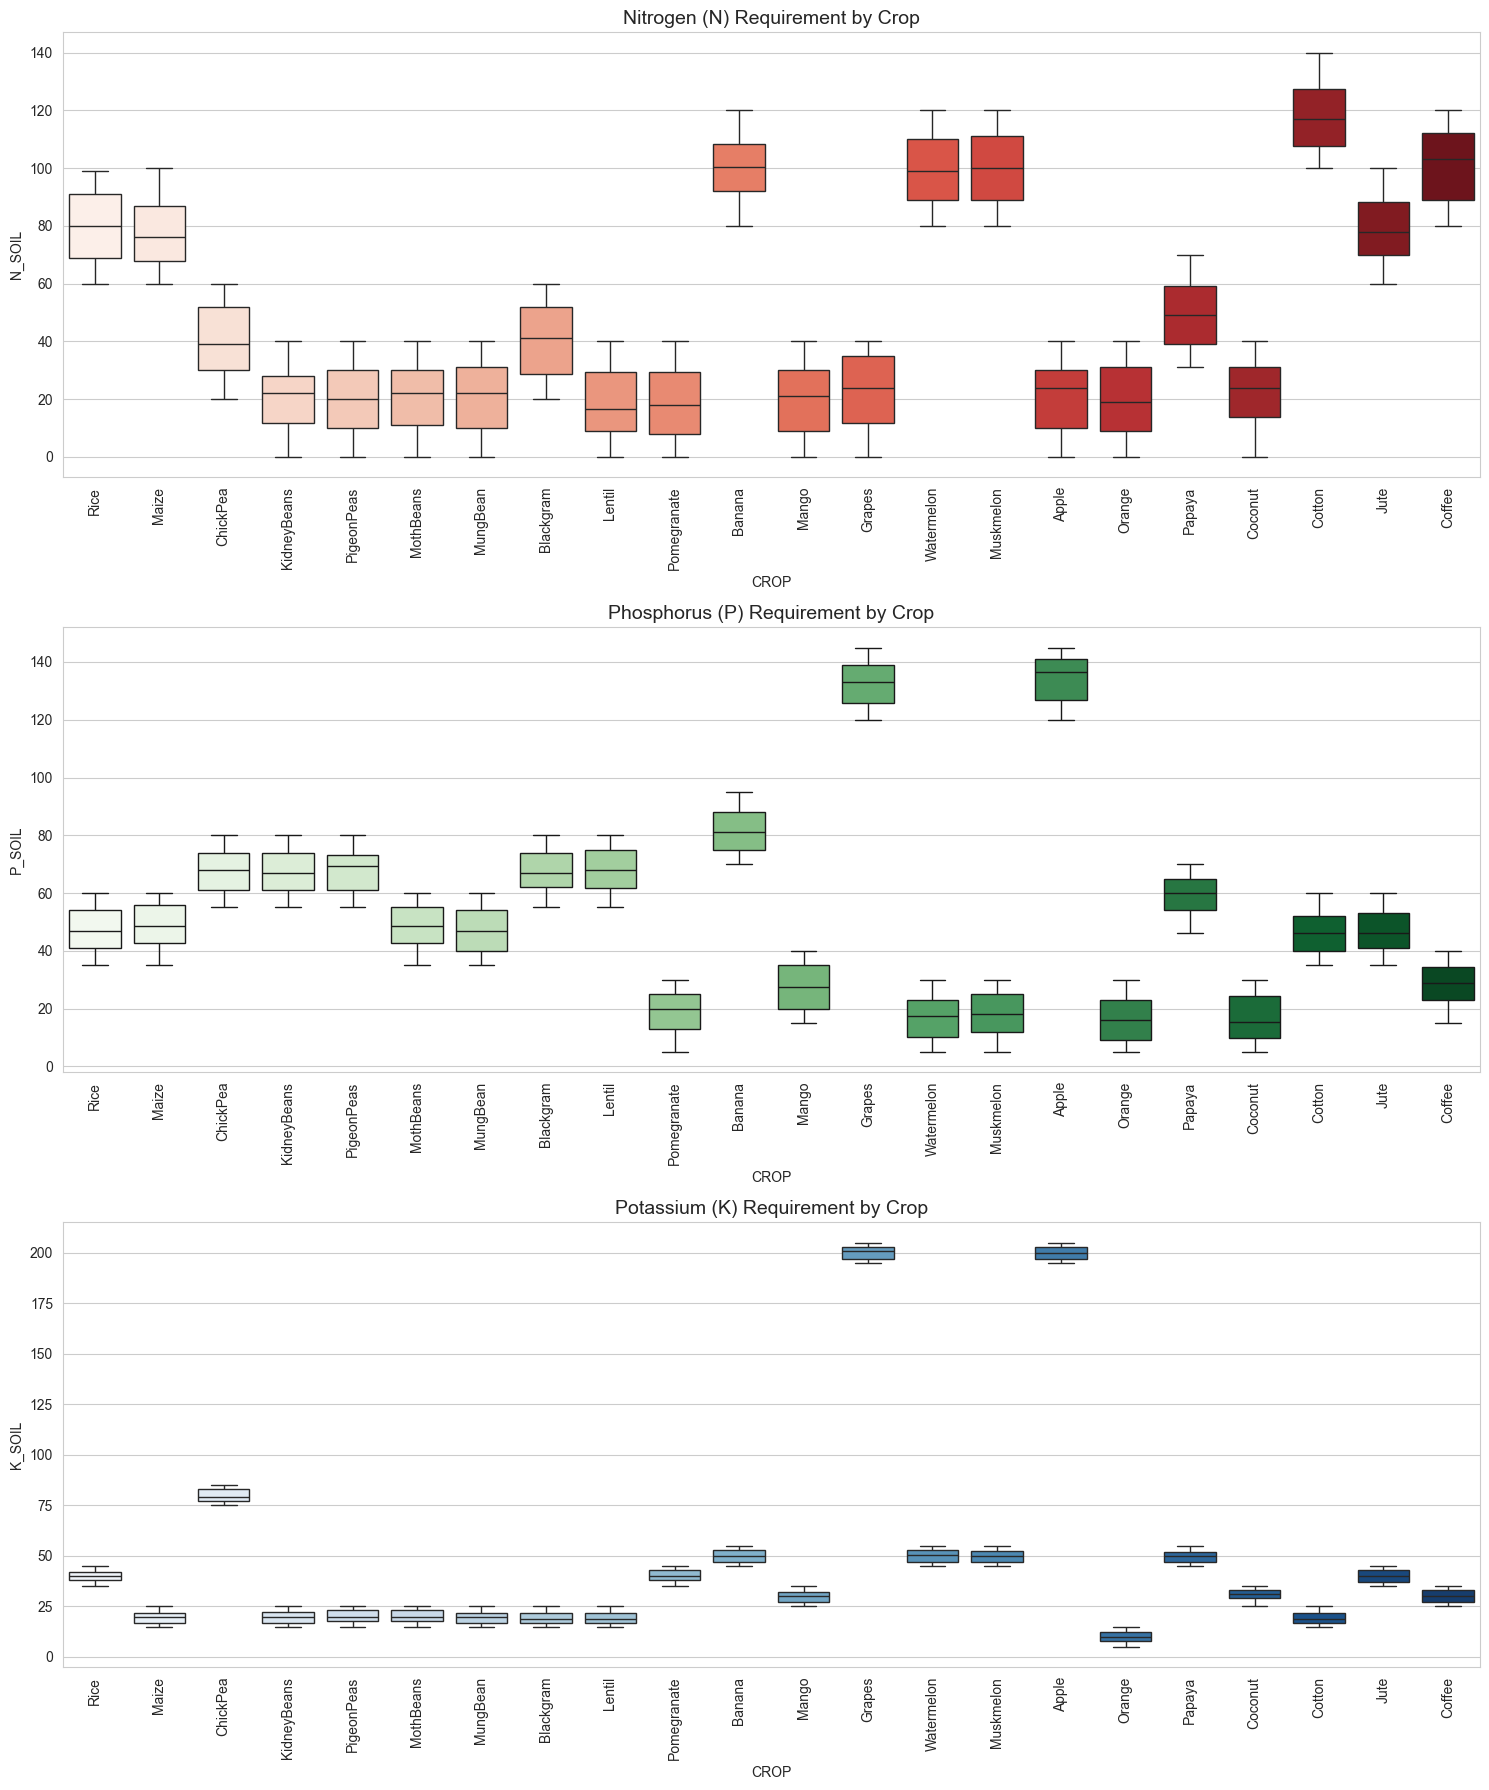

In [11]:
# Create a 1x3 grid of plots
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Nitrogen
sns.boxplot(x='CROP', y='N_SOIL', data=df, ax=axes[0], palette='Reds')
axes[0].set_title('Nitrogen (N) Requirement by Crop', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Phosphorus
sns.boxplot(x='CROP', y='P_SOIL', data=df, ax=axes[1], palette='Greens')
axes[1].set_title('Phosphorus (P) Requirement by Crop', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Potassium
sns.boxplot(x='CROP', y='K_SOIL', data=df, ax=axes[2], palette='Blues')
axes[2].set_title('Potassium (K) Requirement by Crop', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Save Cleaned Data

In [12]:
# Save the cleaned version to be used in the ML step
df.to_csv('cleaned_crop_recommendation_data.csv', index=False)
print("✅ Cleaned data saved successfully.")

✅ Cleaned data saved successfully.
